In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

np.random.seed(33)

In [2]:
%matplotlib inline

In [3]:
N = 500
D = 2

In [4]:
angles = []

for i in tqdm(range(1000)):
    DAG = dag.CausalSetGraph()
    R = dag.minkowski_interval(N, D)
    G = DAG.generate_graph(R, weighted=True)
    greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
    angles.extend(DAG.compute_path_property(greedy_forward, dag.paths.get_angles_relative_to_geodesic).values())

100%|██████████| 1000/1000 [03:55<00:00,  4.24it/s]


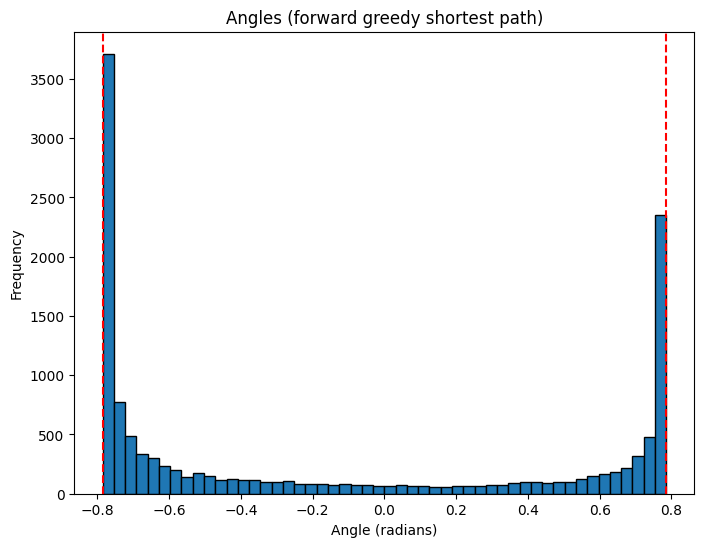

In [5]:
# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(angles, bins=50, edgecolor='black')
# Add dashed vertical lines at ±45 degrees
plt.axvline(np.radians(45), color='r', linestyle='--')
plt.axvline(-np.radians(45), color='r', linestyle='--')
plt.title('Angles (forward greedy shortest path)')
plt.xlabel('Angle (radians)')
plt.ylabel('Frequency')
plt.show()